In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
from datetime import datetime

In [14]:

# 데이터프레임 불러오기
df1 = pd.read_csv('C:/git/Wonder-Pets-1/backend/django/data_analysis/data/datafile/real_final_2020.csv')
df2 = pd.read_csv('C:/git/Wonder-Pets-1/backend/django/data_analysis/data/datafile/real_final_2021.csv')
df3 = pd.read_csv('C:/git/Wonder-Pets-1/backend/django/data_analysis/data/datafile/real_final_2022.csv')
data = pd.concat([df1, df2, df3], axis=0)


In [15]:
data['날짜'] = data['날짜'].astype(str)
data[['년', '월', '일']] = data['날짜'].str.split('-', expand=True)
# '월' 열을 1, 2, 3, 4로 매핑
data['월'] = data['월'].astype(int)
data['계절'] = data['월'].map({1: 4, 2: 4, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 4})


data['날짜'] = pd.to_datetime(data['날짜'])
data['요일'] = data['날짜'].dt.dayofweek

data['요일'] = data['요일'].astype(int)
data['년'] = data['년'].astype(int)
data['일'] = data['일'].astype(int)

data['주말'] = data['요일'].isin([5, 6]).astype(int)

data['대여소ID'] = data['대여소ID'].str.replace('ST-', '')
# '대여소ID', '시간대', '날씨', '요일' 열을 범주형으로 변환
categorical_columns = ['대여소ID', '시간대', '날씨', '요일', '년', '월', '일','주말','400m_지하철','계절']
data[categorical_columns] = data[categorical_columns].astype('category')

data = data.drop(columns=['날짜', '요일', 'Pm10', '일'])
# 대여건수와 반납건수를 열의 가장 마지막으로 이동
data = data[[col for col in data.columns if col not in ['대여건수', '반납건수']] + ['대여건수', '반납건수']]

print(data)
print(data.dtypes)



       대여소ID 시간대   날씨  평균기온(°C)  유동인구(명) 400m_지하철     년   월 계절 주말  대여건수  반납건수
0        818   0  0.0      -2.2  27965.0        1  2020   1  4  0   2.0   0.0
1        818   1  0.0      -2.2  28337.0        1  2020   1  4  0   0.0   0.0
2        818   2  0.0      -2.2  28410.0        1  2020   1  4  0   0.0   0.0
3        818   3  0.0      -2.2  28422.0        1  2020   1  4  0   0.0   2.0
4        818   4  0.0      -2.2  28278.0        1  2020   1  4  0   0.0   0.0
...      ...  ..  ...       ...      ...      ...   ...  .. .. ..   ...   ...
911035   820  19  0.0      -1.2  13682.0        0  2022  12  4  1   0.0   0.0
911036   820  20  0.0      -1.2  13280.0        0  2022  12  4  1   0.0   0.0
911037   820  21  0.0      -1.2  13189.0        0  2022  12  4  1   2.0   0.0
911038   820  22  0.0      -1.2  13016.0        0  2022  12  4  1   0.0   0.0
911039   820  23  0.0      -1.2  15946.0        0  2022  12  4  1   0.0   0.0

[2735616 rows x 12 columns]
대여소ID       category
시간대         ca

c:\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


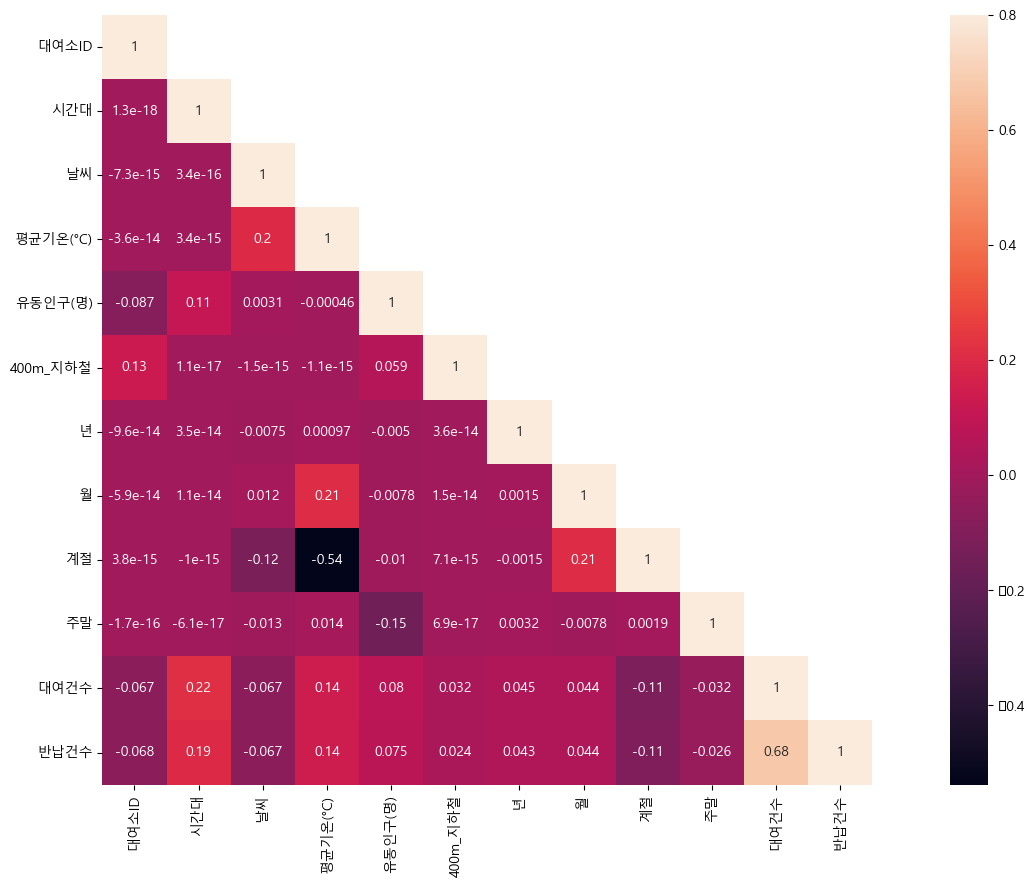

In [16]:
plt.rc('font', family='Malgun Gothic')
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [ ]:
# 각 데이터프레임에서 각 열의 최솟값, 최댓값, 결측값 확인
min_values_df1 = df1.min()
max_values_df1 = df1.max()
missing_values_df1 = df1.isnull().sum()

min_values_df2 = df2.min()
max_values_df2 = df2.max()
missing_values_df2 = df2.isnull().sum()

min_values_df3 = df3.min()
max_values_df3 = df3.max()
missing_values_df3 = df3.isnull().sum()

# 결과 출력
print("DataFrame 1 - Min Values:")
print(min_values_df1)
print("\nDataFrame 1 - Max Values:")
print(max_values_df1)
print("\nDataFrame 1 - Missing Values:")
print(missing_values_df1)

print("\nDataFrame 2 - Min Values:")
print(min_values_df2)
print("\nDataFrame 2 - Max Values:")
print(max_values_df2)
print("\nDataFrame 2 - Missing Values:")
print(missing_values_df2)

print("\nDataFrame 3 - Min Values:")
print(min_values_df3)
print("\nDataFrame 3 - Max Values:")
print(max_values_df3)
print("\nDataFrame 3 - Missing Values:")
print(missing_values_df3)


In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=data,y="대여건수",orient="v",ax=axes[0][0])
sn.boxplot(data=data,y="대여건수",x="계절",orient="v",ax=axes[0][1])
sn.boxplot(data=data,y="대여건수",x="시간대",orient="v",ax=axes[1][0])
sn.boxplot(data=data,y="대여건수",x="주말",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='대여건수',title="Box Plot On 대여건수")
axes[0][1].set(xlabel='계절', ylabel='대여건수',title="Box Plot On 대여건수 Across 계절")
axes[1][0].set(xlabel='시간대 Of The Day', ylabel='대여건수',title="Box Plot On 대여건수 Across 시간대 Of The Day")
axes[1][1].set(xlabel='주말', ylabel='대여건수',title="Box Plot On 대여건수 Across 주말")

In [ ]:
print(data[data['대여건수']>100])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(14, 10)

# 계절 매핑을 위한 딕셔너리 정의
season_map = {1: '봄', 2: '여름', 3: '가을', 4: '겨울'}
data['계절명'] = data['계절'].map(season_map)

# 대여건수에 대한 시간대 별 평균 계산 및 시각화
hourly_agg = pd.DataFrame(data.groupby(["시간대", "계절명"], sort=True)["대여건수"].mean()).reset_index()
sns.pointplot(x="시간대", y="대여건수", hue="계절명", data=hourly_agg, join=True, ax=ax1)
ax1.set(xlabel='시간대', ylabel='대여건수', title="계절에 따른 시간대별 평균 대여건수")

# 반납건수에 대한 시간대 별 평균 계산 및 시각화
hourly_agg = pd.DataFrame(data.groupby(["시간대", "계절명"], sort=True)["반납건수"].mean()).reset_index()
sns.pointplot(x="시간대", y="반납건수", hue="계절명", data=hourly_agg, join=True, ax=ax2)
ax2.set(xlabel='시간대', ylabel='반납건수', title="계절에 따른 시간대별 평균 반납건수")

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(14, 10)

holiday_map = {1: '주말', 0:'평일'}
data['휴일'] = data['주말'].map(holiday_map)

#시간과 휴일 여부에 따른 count
holiday_agg = pd.DataFrame(data.groupby(['시간대', '휴일'], sort=True)['대여건수'].mean()).reset_index()
sns.pointplot(x='시간대',y='대여건수',hue='휴일',data=holiday_agg, join=True, ax=ax1)
ax1.set(xlabel='시간대', ylabel='대여건수', title="휴일에 따른 시간대별 평균 대여건수")

holiday_agg = pd.DataFrame(data.groupby(['시간대', '휴일'], sort=True)['반납건수'].mean()).reset_index()
sns.pointplot(x='시간대',y='반납건수',hue='휴일',data=holiday_agg, join=True, ax=ax2)
ax2.set(xlabel='시간대', ylabel='반납건수', title="휴일에 따른 시간대별 평균 반납건수")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
selected_columns = data[['평균기온(°C)', '유동인구(명)']]
data[['평균기온(°C)', '유동인구(명)']] = scaler.fit_transform(selected_columns)



data = data.drop(columns=['계절명', '휴일'])
print(data.head(10), '\n',data.dtypes, '\n', data.isnull().sum())

In [257]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# 범주형 열을 수치형으로 변환
# data['대여소ID'] = label_encoder.fit_transform(data['대여소ID'])
# data['시간대'] = label_encoder.fit_transform(data['시간대'])
# data['년'] = label_encoder.fit_transform(data['년'])
# data['월'] = label_encoder.fit_transform(data['월'])
# data['계절'] = label_encoder.fit_transform(data['계절'])
# data['날씨'] = label_encoder.fit_transform(data['날씨'])
# data['주말'] = label_encoder.fit_transform(data['주말'])
# data['400m_지하철'] = label_encoder.fit_transform(data['400m_지하철'])

# Function to calculate RMSLE
def rmsle(y_true, y_pred):
    # Ensure non-negative values for y_true and y_pred
    y_true = np.maximum(0, y_true)
    y_pred = np.maximum(0, y_pred)

    y_true_log1p = np.log1p(y_true)
    y_pred_log1p = np.log1p(y_pred)

    return np.sqrt(mean_squared_error(y_true_log1p, y_pred_log1p))


# Assuming 'data' is your DataFrame
# Convert target variables to integers
data['대여건수'] = data['대여건수'].astype(int)
data['반납건수'] = data['반납건수'].astype(int)

# Feature Selection
features = ['대여소ID', '시간대', '날씨', '평균기온(°C)', '유동인구(명)', '400m_지하철', '년', '월', '계절', '주말']

# Target Variable
y_rent = data['대여건수']
y_return = data['반납건수']

# Train-Test Split
X_train_rent, X_test_rent, y_train_rent, y_test_rent = train_test_split(data[features], y_rent, test_size=0.2)
X_train_return, X_test_return, y_train_return, y_test_return = train_test_split(data[features], y_return, test_size=0.2)

# print(X_train_rent.isnull().sum(), X_test_rent.isnull().sum(), y_train_rent.isnull().sum(), y_test_rent.isnull().sum())

print(data.isnull().sum())



대여소ID       0
시간대         0
날씨          0
평균기온(°C)    0
유동인구(명)     0
400m_지하철    0
년           0
월           0
계절          0
주말          0
대여건수        0
반납건수        0
dtype: int64


RMSLE Value For Linear Regression (대여건수): 0.8061066026116901
R-squared Value For Linear Regression (대여건수): 0.08407228133794431


c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


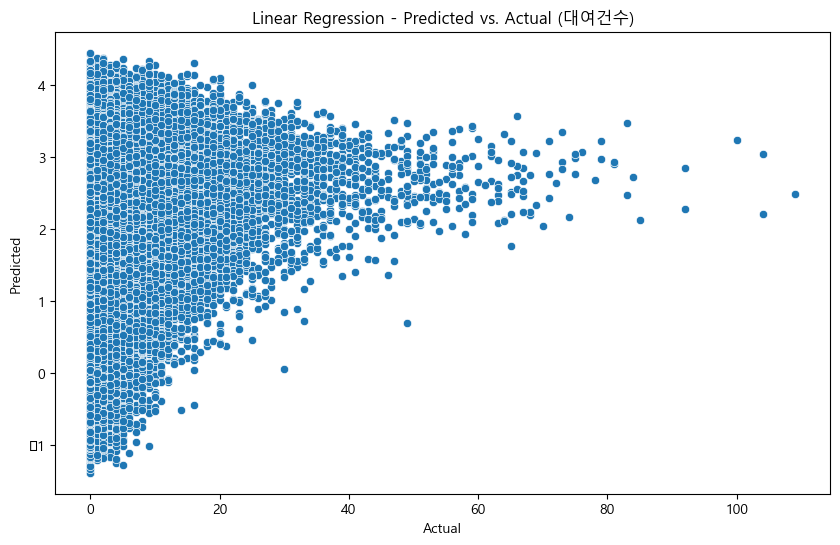

c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


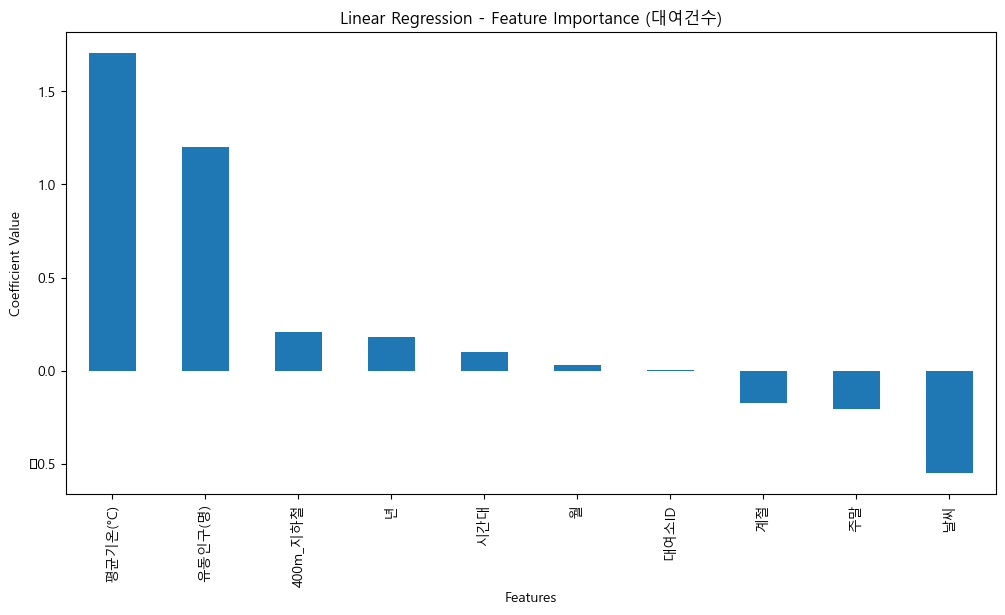

RMSLE Value For Linear Regression (반납건수): 0.7940828999729387
R-squared Value For Linear Regression (반납건수): 0.07113163036077352


c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


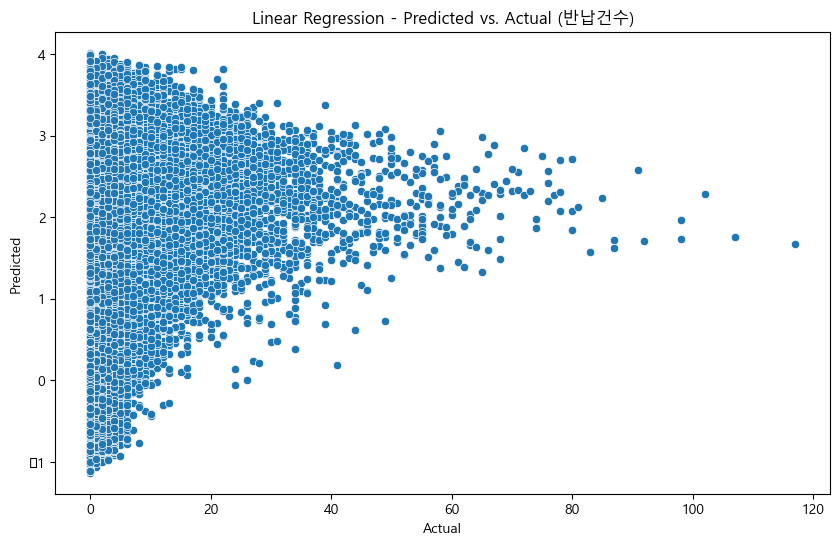

c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


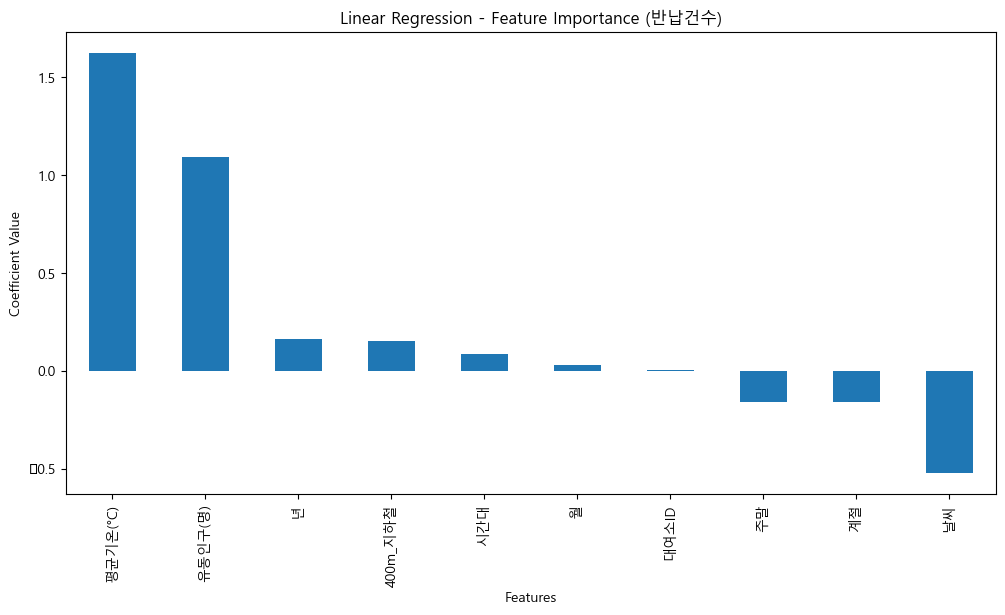

In [258]:
from sklearn.metrics import r2_score
# Linear Regression
lr = LinearRegression()

# 대여건수에 대한 모델
lr.fit(X_train_rent, y_train_rent)
preds_lr_rent = lr.predict(X_test_rent)

# RMSLE 값 계산
rmsle_rent = rmsle(y_test_rent, preds_lr_rent)
print('RMSLE Value For Linear Regression (대여건수): {}'.format(rmsle_rent))

# R-squared 값 계산
r2_rent = r2_score(y_test_rent, preds_lr_rent)
print('R-squared Value For Linear Regression (대여건수): {}'.format(r2_rent))

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_rent, y=preds_lr_rent)
plt.title('Linear Regression - Predicted vs. Actual (대여건수)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 특성 중요도 확인
coefficients_rent = pd.Series(lr.coef_, index=X_train_rent.columns)
coefficients_rent = coefficients_rent.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
coefficients_rent.plot(kind='bar')
plt.title('Linear Regression - Feature Importance (대여건수)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

# 반납건수에 대한 모델
lr.fit(X_train_return, y_train_return)
preds_lr_return = lr.predict(X_test_return)

# RMSLE 값 계산
rmsle_return = rmsle(y_test_return, preds_lr_return)
print('RMSLE Value For Linear Regression (반납건수): {}'.format(rmsle_return))

# R-squared 값 계산
r2_return = r2_score(y_test_return, preds_lr_return)
print('R-squared Value For Linear Regression (반납건수): {}'.format(r2_return))

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_return, y=preds_lr_return)
plt.title('Linear Regression - Predicted vs. Actual (반납건수)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 특성 중요도 확인
coefficients_return = pd.Series(lr.coef_, index=X_train_return.columns)
coefficients_return = coefficients_return.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
coefficients_return.plot(kind='bar')
plt.title('Linear Regression - Feature Importance (반납건수)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

RMSLE Value for Ridge Regression (대여건수): 0.8061066430516425
R-squared Value for Ridge Regression (대여건수): 0.08407237510816434


c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


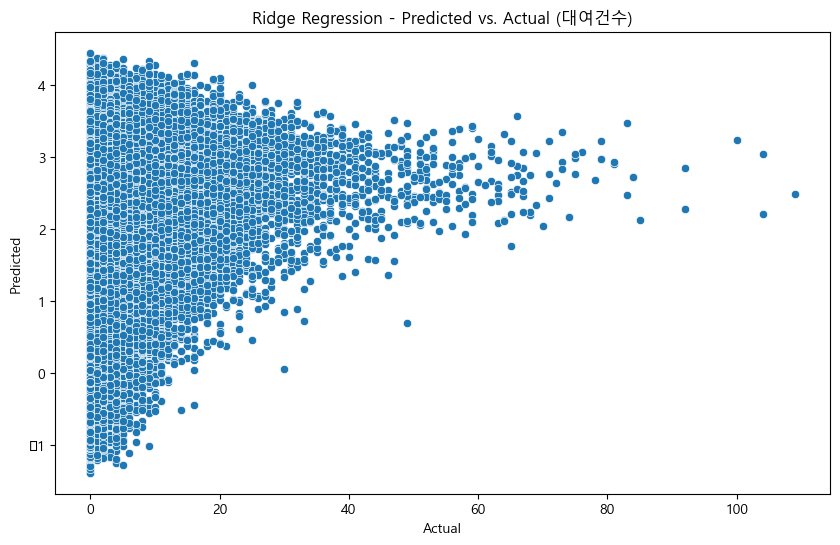

c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


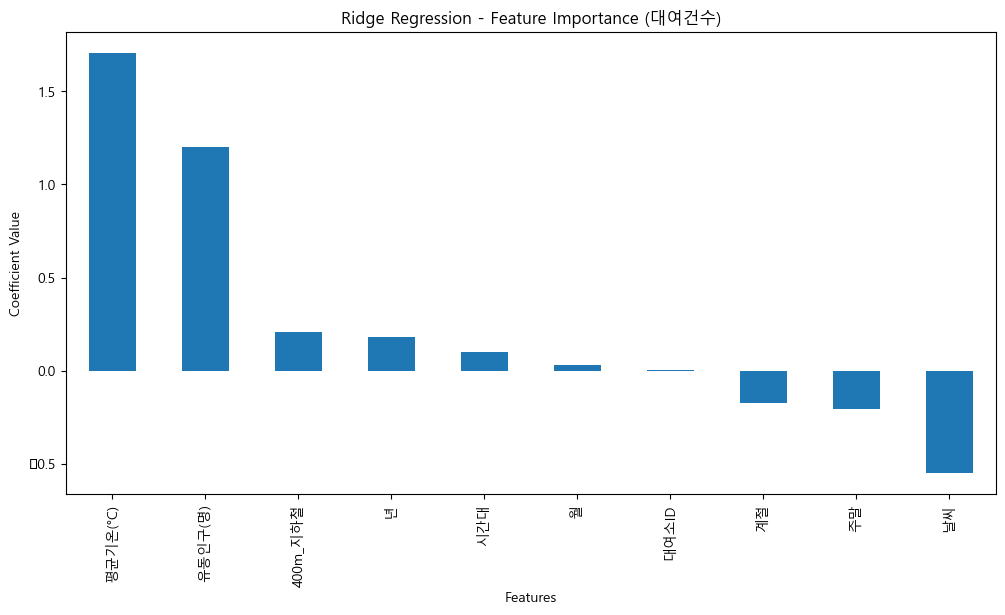

RMSLE Value for Ridge Regression (반납건수): 0.7940830137957333
R-squared Value for Ridge Regression (반납건수): 0.07113165809727973


c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


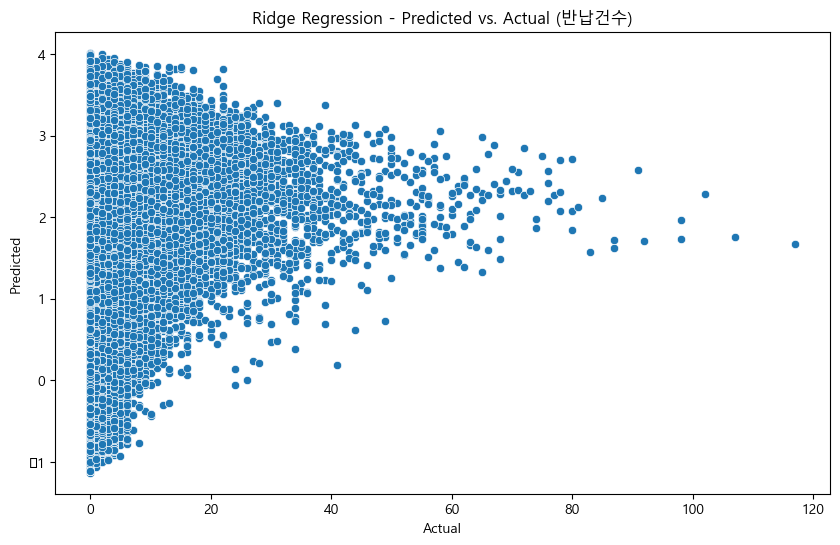

c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


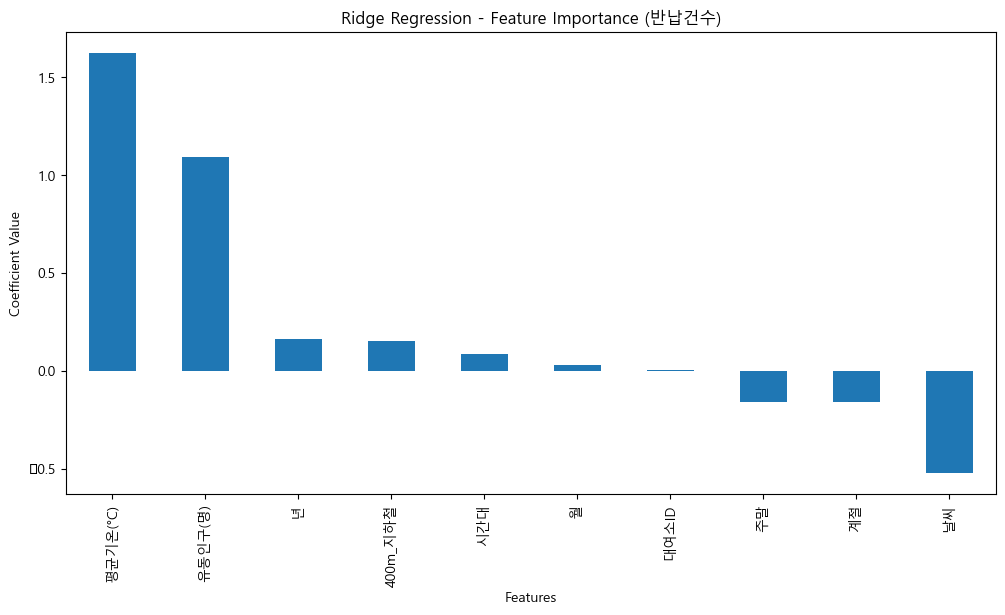

In [259]:
from sklearn.linear_model import Ridge

# Ridge Regression for 대여건수
ridge = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_ridge_rent = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
grid_ridge_rent.fit(X_train_rent, y_train_rent)
preds_ridge_rent = grid_ridge_rent.predict(X_test_rent)

# RMSLE 및 R-squared 값 계산
rmsle_ridge_rent = rmsle(y_test_rent, preds_ridge_rent)
r2_ridge_rent = r2_score(y_test_rent, preds_ridge_rent)

# 결과 출력
print('RMSLE Value for Ridge Regression (대여건수): {}'.format(rmsle_ridge_rent))
print('R-squared Value for Ridge Regression (대여건수): {}'.format(r2_ridge_rent))

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_rent, y=preds_ridge_rent)
plt.title('Ridge Regression - Predicted vs. Actual (대여건수)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 특성 중요도 확인
coefficients_ridge_rent = pd.Series(grid_ridge_rent.best_estimator_.coef_, index=X_train_rent.columns)
coefficients_ridge_rent = coefficients_ridge_rent.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
coefficients_ridge_rent.plot(kind='bar')
plt.title('Ridge Regression - Feature Importance (대여건수)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

# Ridge Regression for 반납건수
grid_ridge_return = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
grid_ridge_return.fit(X_train_return, y_train_return)
preds_ridge_return = grid_ridge_return.predict(X_test_return)

# RMSLE 및 R-squared 값 계산
rmsle_ridge_return = rmsle(y_test_return, preds_ridge_return)
r2_ridge_return = r2_score(y_test_return, preds_ridge_return)

# 결과 출력
print('RMSLE Value for Ridge Regression (반납건수): {}'.format(rmsle_ridge_return))
print('R-squared Value for Ridge Regression (반납건수): {}'.format(r2_ridge_return))

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_return, y=preds_ridge_return)
plt.title('Ridge Regression - Predicted vs. Actual (반납건수)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 특성 중요도 확인
coefficients_ridge_return = pd.Series(grid_ridge_return.best_estimator_.coef_, index=X_train_return.columns)
coefficients_ridge_return = coefficients_ridge_return.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
coefficients_ridge_return.plot(kind='bar')
plt.title('Ridge Regression - Feature Importance (반납건수)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


RMSLE Value for Lasso Regression (대여건수): 0.8070948076039537
R-squared Value for Lasso Regression (대여건수): 0.08426350043813269


c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


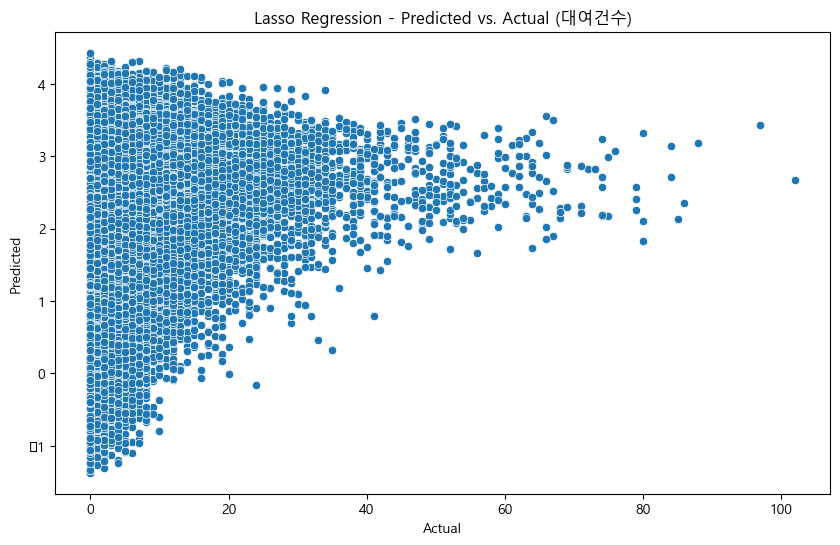

c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


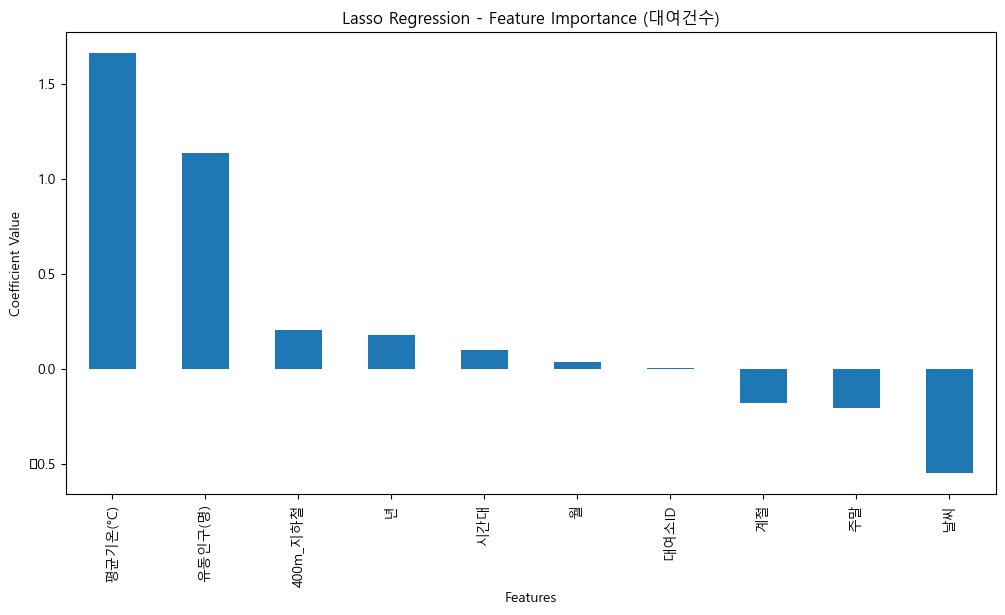

RMSLE Value for Lasso Regression (반납건수): 0.7942638030302775
R-squared Value for Lasso Regression (반납건수): 0.07369890121407408


c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


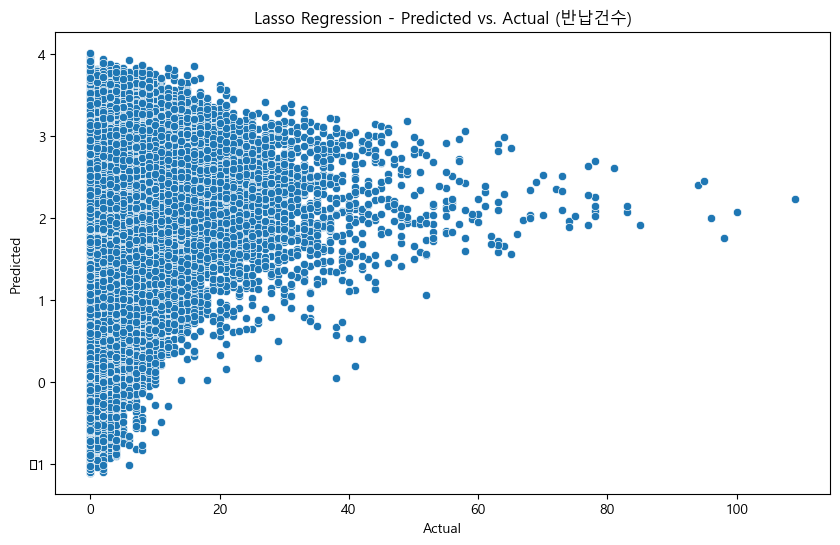

c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


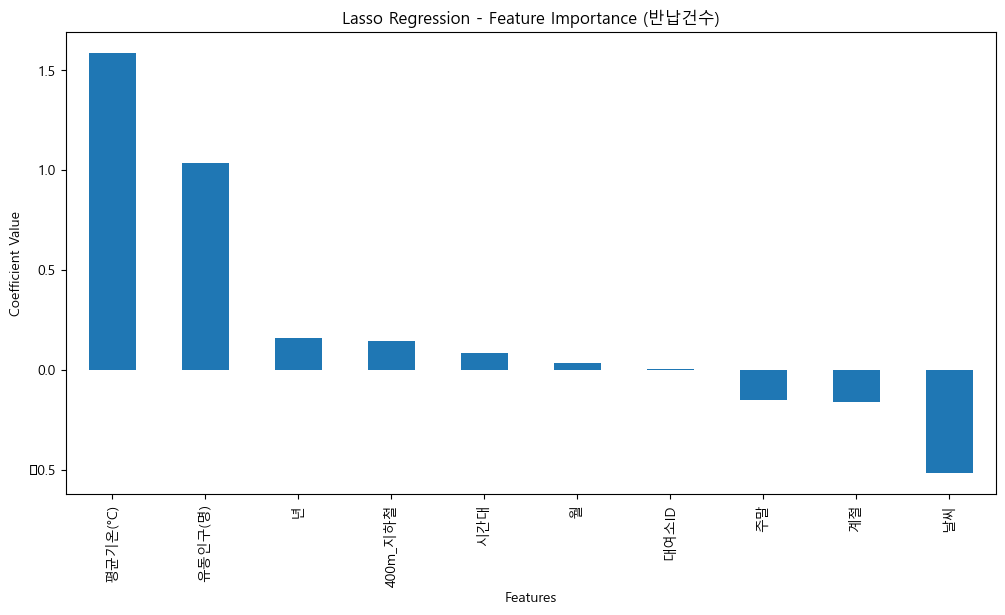

In [255]:
from sklearn.linear_model import Lasso

# Lasso Regression for 대여건수
lasso = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lasso_rent = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
grid_lasso_rent.fit(X_train_rent, y_train_rent)
preds_lasso_rent = grid_lasso_rent.predict(X_test_rent)

# RMSLE 및 R-squared 값 계산
rmsle_lasso_rent = rmsle(y_test_rent, preds_lasso_rent)
r2_lasso_rent = r2_score(y_test_rent, preds_lasso_rent)

# 결과 출력
print('RMSLE Value for Lasso Regression (대여건수): {}'.format(rmsle_lasso_rent))
print('R-squared Value for Lasso Regression (대여건수): {}'.format(r2_lasso_rent))

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_rent, y=preds_lasso_rent)
plt.title('Lasso Regression - Predicted vs. Actual (대여건수)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 특성 중요도 확인
coefficients_lasso_rent = pd.Series(grid_lasso_rent.best_estimator_.coef_, index=X_train_rent.columns)
coefficients_lasso_rent = coefficients_lasso_rent.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
coefficients_lasso_rent.plot(kind='bar')
plt.title('Lasso Regression - Feature Importance (대여건수)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

# Lasso Regression for 반납건수
grid_lasso_return = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
grid_lasso_return.fit(X_train_return, y_train_return)
preds_lasso_return = grid_lasso_return.predict(X_test_return)

# RMSLE 및 R-squared 값 계산
rmsle_lasso_return = rmsle(y_test_return, preds_lasso_return)
r2_lasso_return = r2_score(y_test_return, preds_lasso_return)

# 결과 출력
print('RMSLE Value for Lasso Regression (반납건수): {}'.format(rmsle_lasso_return))
print('R-squared Value for Lasso Regression (반납건수): {}'.format(r2_lasso_return))

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_return, y=preds_lasso_return)
plt.title('Lasso Regression - Predicted vs. Actual (반납건수)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 특성 중요도 확인
coefficients_lasso_return = pd.Series(grid_lasso_return.best_estimator_.coef_, index=X_train_return.columns)
coefficients_lasso_return = coefficients_lasso_return.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
coefficients_lasso_return.plot(kind='bar')
plt.title('Lasso Regression - Feature Importance (반납건수)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


In [ ]:

# RandomForest
rf = RandomForestRegressor()
rf_params = {'n_estimators': [10, 50, 100, 200]}
grid_rf_rent = GridSearchCV(rf, rf_params, scoring='neg_mean_squared_error', cv=5)
grid_rf_rent.fit(X_train_rent, y_train_rent)
preds_rf_rent = grid_rf_rent.predict(X_test_rent)
print('RMSLE Value for RandomForest (대여건수): {}'.format(rmsle(y_test_rent, preds_rf_rent)))

grid_rf_return = GridSearchCV(rf, rf_params, scoring='neg_mean_squared_error', cv=5)
grid_rf_return.fit(X_train_return, y_train_return)
preds_rf_return = grid_rf_return.predict(X_test_return)
print('RMSLE Value for RandomForest (반납건수): {}'.format(rmsle(y_test_return, preds_rf_return)))



In [ ]:

# GradientBoosting
gb = GradientBoostingRegressor()
gb_params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5, 7]}
grid_gb_rent = GridSearchCV(gb, gb_params, scoring='neg_mean_squared_error', cv=5)
grid_gb_rent.fit(X_train_rent, y_train_rent)
preds_gb_rent = grid_gb_rent.predict(X_test_rent)
print('RMSLE Value for GradientBoosting (대여건수): {}'.format(rmsle(y_test_rent, preds_gb_rent)))

grid_gb_return = GridSearchCV(gb, gb_params, scoring='neg_mean_squared_error', cv=5)
grid_gb_return.fit(X_train_return, y_train_return)
preds_gb_return = grid_gb_return.predict(X_test_return)
print('RMSLE Value for GradientBoosting (반납건수): {}'.format(rmsle(y_test_return, preds_gb_return)))

# You can now use the trained models to make predictions on your test set or new data
# For example, if 'new_data' is your new dataset:
# preds_lr_rent = lr.predict(new_data[features])
# preds_ridge_rent = grid_ridge_rent.predict(new_data[features])
# preds_lasso_rent = grid_lasso_rent.predict(new_data[features])
# preds_rf_rent = grid_rf_rent.predict(new_data[features])
# preds_gb_rent = grid_gb_rent.predict(new_data[features])
#
# preds_lr_return = lr.predict(new_data[features])
# preds_ridge_return = grid_ridge_return.predict(new_data[features])
# preds_lasso_return = grid_lasso_return.predict(new_data[features])
# preds_rf_return = grid_rf_return.predict(new_data[features])
# preds_gb_return = grid_gb_return.predict(new_data[features])